## PEPE-ETH

In [76]:
# load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_cex_pepe_usdc = pd.read_csv("PEPE_USDC_1m_from_01-05-2024.csv")
df_dex_pepe_eth = pd.read_csv("PEPE_ETH_1m_ohlc.csv")

In [77]:
# price is how much pepe 1 eth costs
df_dex_pepe_eth.head()

,timestamp,open,high,low,close,volume
0,2024-04-30 22:04:00,4.529375e+08,4.531586e+08,4.529375e+08,4.529375e+08,1.572030e+09
1,2024-04-30 22:05:00,4.529375e+08,4.530520e+08,4.529375e+08,4.530520e+08,1.643026e+08
2,2024-04-30 22:06:00,4.530520e+08,4.531847e+08,4.530520e+08,4.531847e+08,1.902038e+08
3,2024-04-30 22:07:00,4.531847e+08,4.531847e+08,4.531847e+08,4.531847e+08,0.000000e+00
4,2024-04-30 22:08:00,4.531847e+08,4.531847e+08,4.531810e+08,4.531810e+08,5.249541e+06


In [78]:
# price is how much usdc 1 pepe costs - it's necessary to take cross-rate
df_cex_pepe_usdc.head()

,timestamp,open,high,low,close,volume,pair
0,2024-05-01 00:00:00,0.000007,0.000007,0.000007,0.000007,0.0,PEPE/USDC
1,2024-05-01 00:01:00,0.000007,0.000007,0.000007,0.000007,0.0,PEPE/USDC
2,2024-05-01 00:02:00,0.000007,0.000007,0.000007,0.000007,251027206.0,PEPE/USDC
3,2024-05-01 00:03:00,0.000007,0.000007,0.000007,0.000007,0.0,PEPE/USDC
4,2024-05-01 00:04:00,0.000007,0.000007,0.000007,0.000007,0.0,PEPE/USDC


In [79]:
# load eth-usdc data
df_cex_eth_usdc = pd.read_csv("ETH_USDC_1m_from_01-05-2024.csv")

In [80]:
# take a look
df_cex_eth_usdc.head()

,timestamp,open,high,low,close,volume,pair
0,2024-05-01 00:00:00,3011.40,3014.60,3011.00,3014.60,5.3843,ETH/USDC
1,2024-05-01 00:01:00,3013.59,3015.80,3013.57,3015.05,2.0334,ETH/USDC
2,2024-05-01 00:02:00,3014.66,3014.66,3009.54,3010.53,8.8738,ETH/USDC
3,2024-05-01 00:03:00,3010.18,3011.60,3010.18,3011.60,0.9529,ETH/USDC
4,2024-05-01 00:04:00,3011.59,3012.40,3010.70,3011.20,1.9819,ETH/USDC


In [85]:
# reverse price for pepe/usdc
df_cex_pepe_usdc["open"] = 1 / df_cex_pepe_usdc["open"]
df_cex_pepe_usdc["close"] = 1 / df_cex_pepe_usdc["close"]

df_cex_pepe_usdc["high"] = pd.concat([
    1 / df_cex_pepe_usdc["low"], 1 / df_cex_pepe_usdc["high"], df_cex_pepe_usdc["open"], df_cex_pepe_usdc["close"]
], axis=1).max(axis=1)

df_cex_pepe_usdc["low"] = pd.concat([
    df_cex_pepe_usdc["close"], df_cex_pepe_usdc["high"], df_cex_pepe_usdc["open"], 1 / df_cex_pepe_usdc["low"]
], axis=1).min(axis=1)

In [86]:
df_cex_pepe_usdc

,timestamp,open,high,low,close,volume,pair
0,2024-05-01 00:00:00,150375.939850,150375.939850,150375.939850,150375.939850,0.000000e+00,PEPE/USDC
1,2024-05-01 00:01:00,150375.939850,150375.939850,150375.939850,150375.939850,0.000000e+00,PEPE/USDC
2,2024-05-01 00:02:00,150375.939850,150375.939850,150375.939850,150375.939850,2.510272e+08,PEPE/USDC
3,2024-05-01 00:03:00,150375.939850,150375.939850,150375.939850,150375.939850,0.000000e+00,PEPE/USDC
4,2024-05-01 00:04:00,150375.939850,150375.939850,150375.939850,150375.939850,0.000000e+00,PEPE/USDC
...,...,...,...,...,...,...,...
542130,2025-05-12 11:30:00,68493.150685,68634.179822,68493.150685,68540.095956,9.742904e+08,PEPE/USDC
542131,2025-05-12 11:31:00,68587.105624,68728.522337,68587.105624,68634.179822,2.962332e+09,PEPE/USDC
542132,2025-05-12 11:32:00,68634.179822,68728.522337,68634.179822,68728.522337,5.107066e+09,PEPE/USDC
542133,2025-05-12 11:33:00,68681.318681,68728.522337,68399.452804,68399.452804,1.668323e+09,PEPE/USDC


In [87]:
# create ETH - PEPE dataframe based on cross-exchange
df_cex = pd.DataFrame(columns=df_cex_pepe_usdc.columns)
df_cex["timestamp"] = df_cex_pepe_usdc["timestamp"]
# volume in pepe
df_cex["volume"] = df_cex_pepe_usdc["volume"]
df_cex["pair"] = "ETH/PEPE"
df_cex["open"] = df_cex_eth_usdc["open"] * df_cex_pepe_usdc["open"]
df_cex["high"] = df_cex_eth_usdc["high"] * df_cex_pepe_usdc["high"]
df_cex["low"] = df_cex_eth_usdc["low"] * df_cex_pepe_usdc["low"]
df_cex["close"] = df_cex_eth_usdc["close"] * df_cex_pepe_usdc["close"]
df_cex.head()

,timestamp,open,high,low,close,volume,pair
0,2024-05-01 00:00:00,4.528421e+08,4.533233e+08,4.527820e+08,4.533233e+08,0.0,ETH/PEPE
1,2024-05-01 00:01:00,4.531714e+08,4.535038e+08,4.531684e+08,4.533910e+08,0.0,ETH/PEPE
2,2024-05-01 00:02:00,4.533323e+08,4.533323e+08,4.525624e+08,4.527113e+08,251027206.0,ETH/PEPE
3,2024-05-01 00:03:00,4.526586e+08,4.528722e+08,4.526586e+08,4.528722e+08,0.0,ETH/PEPE
4,2024-05-01 00:04:00,4.528707e+08,4.529925e+08,4.527368e+08,4.528120e+08,0.0,ETH/PEPE


In [88]:
df_dex_pepe_eth.head()

,timestamp,open,high,low,close,volume
0,2024-04-30 22:04:00,4.529375e+08,4.531586e+08,4.529375e+08,4.529375e+08,1.572030e+09
1,2024-04-30 22:05:00,4.529375e+08,4.530520e+08,4.529375e+08,4.530520e+08,1.643026e+08
2,2024-04-30 22:06:00,4.530520e+08,4.531847e+08,4.530520e+08,4.531847e+08,1.902038e+08
3,2024-04-30 22:07:00,4.531847e+08,4.531847e+08,4.531847e+08,4.531847e+08,0.000000e+00
4,2024-04-30 22:08:00,4.531847e+08,4.531847e+08,4.531810e+08,4.531810e+08,5.249541e+06


In [89]:
# merge cex and dex data
cex_dex = df_cex.merge(df_dex_pepe_eth, on = "timestamp", how = "inner", suffixes=("_cex", "_dex"))

In [90]:
# take a look at what we've got
cex_dex.head()

,timestamp,open_cex,high_cex,low_cex,close_cex,volume_cex,pair,open_dex,high_dex,low_dex,close_dex,volume_dex
0,2024-05-01 00:00:00,4.528421e+08,4.533233e+08,4.527820e+08,4.533233e+08,0.0,ETH/PEPE,4.507971e+08,4.507971e+08,4.507971e+08,4.507971e+08,0.000000e+00
1,2024-05-01 00:01:00,4.531714e+08,4.535038e+08,4.531684e+08,4.533910e+08,0.0,ETH/PEPE,4.507971e+08,4.507971e+08,4.507971e+08,4.507971e+08,0.000000e+00
2,2024-05-01 00:02:00,4.533323e+08,4.533323e+08,4.525624e+08,4.527113e+08,251027206.0,ETH/PEPE,4.507971e+08,4.513173e+08,4.507971e+08,4.513173e+08,7.514281e+08
3,2024-05-01 00:03:00,4.526586e+08,4.528722e+08,4.526586e+08,4.528722e+08,0.0,ETH/PEPE,4.513173e+08,4.513173e+08,4.513173e+08,4.513173e+08,0.000000e+00
4,2024-05-01 00:04:00,4.528707e+08,4.529925e+08,4.527368e+08,4.528120e+08,0.0,ETH/PEPE,4.513173e+08,4.513173e+08,4.513173e+08,4.513173e+08,0.000000e+00


In [91]:
# function to calculate some variables
def stat_calc(df: pd.DataFrame):
    df = df.copy()
    # absolute difference
    df["abs_diff"] = df["close_cex"] - df["close_dex"]
    # relative difference to minimal price (on cex or dex)
    df["rel_diff"] = (abs(df["abs_diff"]) / df[["close_dex", "close_cex"]].min(axis=1))
    # buy where price is lower
    df["buy"] = np.where(df["abs_diff"] > 0, "DEX", "CEX")
    # sell where price is higher
    df["sell"] = np.where(df["abs_diff"] <= 0, "DEX", "CEX")
    return df
    

In [92]:
# calculate simple variables - apply stat_calc
df_stat = stat_calc(cex_dex)

In [93]:
# fees

# uniswap fee for this pool is 0.3%
dex_pool_fee = 0.003

# consider 2 different fees for cex: 0.1% is default for spot on binance 
# multiply by 2 to approximate double exchange on cex
cex_fee_def = 0.001 * 2
# minimal fee for binance spot: VIP9 + pay in BNB
cex_fee_min = 0.0001725 * 2
# calculate buy and sell prices with fees
df_stat["buy_price_fee_def"] = np.where(df_stat["buy"] == "CEX", df_stat["close_cex"] / (1-cex_fee_def), df_stat["close_dex"] / (1-dex_pool_fee))
df_stat["sell_price_fee_def"] = np.where(df_stat["sell"] == "CEX", df_stat["close_cex"]*(1-cex_fee_def), df_stat["close_dex"] * (1-dex_pool_fee))
# min fee
df_stat["buy_price_fee_min"] = np.where(df_stat["buy"] == "CEX", df_stat["close_cex"] / (1-cex_fee_min), df_stat["close_dex"] / (1-dex_pool_fee))
df_stat["sell_price_fee_min"] = np.where(df_stat["sell"] == "CEX", df_stat["close_cex"]*(1-cex_fee_min), df_stat["close_dex"] * (1-dex_pool_fee))


In [94]:
# calculation of spreads
df_stat["price_spread_fee_def"] = (df_stat["sell_price_fee_def"] - df_stat["buy_price_fee_def"]) / df_stat["buy_price_fee_def"]
df_stat["price_spread_fee_min"] = (df_stat["sell_price_fee_min"] - df_stat["buy_price_fee_min"]) / df_stat["buy_price_fee_min"]


In [95]:
# it's possible to consider different strategies depending on value of spread threshold: the higher it is - the less signals you get

# in the further code we will get statistics for several thresholds

# here we will make calculations with a threshold 0 with a purpose of visualization
# define threshold
spread_threshold = 0
# create signal variable: 1 if spread is larger than threshold
df_stat["signal_fee_def"] = np.where(df_stat["price_spread_fee_def"] > spread_threshold, 1, 0)
df_stat["signal_fee_min"] = np.where(df_stat["price_spread_fee_min"] > spread_threshold, 1, 0)

print(f"Total number of signals with threshold = {spread_threshold} and default CEX fee = {cex_fee_def}: {df_stat["signal_fee_def"].sum()}")
print(f"Total number of signals with threshold = {spread_threshold} and minimal CEX fee = {cex_fee_min}: {df_stat["signal_fee_min"].sum()}")

# shift signal variable to compare it with itself: if values are different - new sequence starts
df_stat["sequence_id_fee_def"] = (df_stat["signal_fee_def"] != df_stat["signal_fee_def"].shift()).cumsum()
# choose sequences with signal presence (1)
groups_with_signal_fee_def = df_stat[df_stat['signal_fee_def'] == 1].groupby("sequence_id_fee_def").size()
# average window size
average_signal_duration_fee_def = groups_with_signal_fee_def.mean()

# same for minimal fee
df_stat["sequence_id_fee_min"] = (df_stat["signal_fee_min"] != df_stat["signal_fee_min"].shift()).cumsum()
# choose sequences with signal presence (1)
groups_with_signal_fee_min = df_stat[df_stat['signal_fee_min'] == 1].groupby("sequence_id_fee_min").size()
# average window size
average_signal_duration_fee_min = groups_with_signal_fee_min.mean()

Total number of signals with threshold = 0 and default CEX fee = 0.002: 4529
Total number of signals with threshold = 0 and minimal CEX fee = 0.000345: 55958


In [96]:
# longest window for def fee
# pretty large spread
longest_window_index = groups_with_signal_fee_def.idxmax()
df_stat[df_stat["sequence_id_fee_def"] == longest_window_index]

,timestamp,open_cex,high_cex,low_cex,close_cex,volume_cex,pair,open_dex,high_dex,low_dex,...,buy_price_fee_def,sell_price_fee_def,buy_price_fee_min,sell_price_fee_min,price_spread_fee_def,price_spread_fee_min,signal_fee_def,signal_fee_min,sequence_id_fee_def,sequence_id_fee_min
44840,2024-06-01 03:20:00,2.487995e+08,2.487995e+08,2.487995e+08,2.487995e+08,0.0,ETH/PEPE,2.476155e+08,2.476155e+08,2.473805e+08,...,2.481249e+08,2.483019e+08,2.481249e+08,2.487136e+08,0.000713,0.002373,1,1,1747,7671
44841,2024-06-01 03:21:00,2.489459e+08,2.489459e+08,2.488489e+08,2.489228e+08,0.0,ETH/PEPE,2.473805e+08,2.473805e+08,2.473154e+08,...,2.480596e+08,2.484250e+08,2.480596e+08,2.488369e+08,0.001473,0.003134,1,1,1747,7671
44842,2024-06-01 03:22:00,2.489011e+08,2.489011e+08,2.489011e+08,2.489011e+08,0.0,ETH/PEPE,2.473154e+08,2.473154e+08,2.473154e+08,...,2.480596e+08,2.484033e+08,2.480596e+08,2.488152e+08,0.001385,0.003046,1,1,1747,7671
44843,2024-06-01 03:23:00,2.489004e+08,2.489004e+08,2.488602e+08,2.488602e+08,0.0,ETH/PEPE,2.473154e+08,2.473416e+08,2.473154e+08,...,2.480676e+08,2.483624e+08,2.480676e+08,2.487743e+08,0.001188,0.002849,1,1,1747,7671
44844,2024-06-01 03:24:00,2.489017e+08,2.489017e+08,2.488259e+08,2.488522e+08,0.0,ETH/PEPE,2.473234e+08,2.473234e+08,2.473234e+08,...,2.480676e+08,2.483545e+08,2.480676e+08,2.487664e+08,0.001157,0.002817,1,1,1747,7671
44845,2024-06-01 03:25:00,2.488654e+08,2.489710e+08,2.488654e+08,2.489710e+08,0.0,ETH/PEPE,2.473234e+08,2.473234e+08,2.473234e+08,...,2.480676e+08,2.484730e+08,2.480676e+08,2.488851e+08,0.001634,0.003295,1,1,1747,7671
44846,2024-06-01 03:26:00,2.489703e+08,2.489993e+08,2.489703e+08,2.489901e+08,0.0,ETH/PEPE,2.473234e+08,2.473234e+08,2.473234e+08,...,2.480676e+08,2.484921e+08,2.480676e+08,2.489042e+08,0.001711,0.003372,1,1,1747,7671
44847,2024-06-01 03:27:00,2.489703e+08,2.489921e+08,2.489571e+08,2.489894e+08,0.0,ETH/PEPE,2.473234e+08,2.473234e+08,2.473234e+08,...,2.480676e+08,2.484915e+08,2.480676e+08,2.489035e+08,0.001709,0.003370,1,1,1747,7671
44848,2024-06-01 03:28:00,2.490099e+08,2.490099e+08,2.489340e+08,2.489340e+08,0.0,ETH/PEPE,2.473234e+08,2.473234e+08,2.473234e+08,...,2.480676e+08,2.484362e+08,2.480676e+08,2.488482e+08,0.001486,0.003147,1,1,1747,7671
44849,2024-06-01 03:29:00,2.489499e+08,2.489499e+08,2.489499e+08,2.489499e+08,0.0,ETH/PEPE,2.473234e+08,2.473234e+08,2.473234e+08,...,2.480676e+08,2.484520e+08,2.480676e+08,2.488640e+08,0.001550,0.003210,1,1,1747,7671


In [97]:
# longest window for min fee
# very small spread 
longest_window_index = groups_with_signal_fee_min.idxmax()
df_stat[df_stat["sequence_id_fee_min"] == longest_window_index]

,timestamp,open_cex,high_cex,low_cex,close_cex,volume_cex,pair,open_dex,high_dex,low_dex,...,buy_price_fee_def,sell_price_fee_def,buy_price_fee_min,sell_price_fee_min,price_spread_fee_def,price_spread_fee_min,signal_fee_def,signal_fee_min,sequence_id_fee_def,sequence_id_fee_min
16164,2024-05-12 05:24:00,3.378764e+08,3.378764e+08,3.374856e+08,3.374856e+08,26213802.0,ETH/PEPE,3.388406e+08,3.388406e+08,3.388406e+08,...,3.381619e+08,3.378241e+08,3.376021e+08,3.378241e+08,-0.000999,0.000658,0,1,682,2747
16165,2024-05-12 05:25:00,3.374625e+08,3.374625e+08,3.371407e+08,3.371476e+08,0.0,ETH/PEPE,3.388406e+08,3.388406e+08,3.385290e+08,...,3.378233e+08,3.375134e+08,3.372640e+08,3.375134e+08,-0.000917,0.000739,0,1,682,2747
16166,2024-05-12 05:26:00,3.371765e+08,3.371765e+08,3.371176e+08,3.371396e+08,0.0,ETH/PEPE,3.385290e+08,3.385290e+08,3.385290e+08,...,3.378152e+08,3.375134e+08,3.372559e+08,3.375134e+08,-0.000893,0.000763,0,1,682,2747
16167,2024-05-12 05:27:00,3.370900e+08,3.371038e+08,3.370473e+08,3.370473e+08,0.0,ETH/PEPE,3.385290e+08,3.385290e+08,3.385290e+08,...,3.377227e+08,3.375134e+08,3.371636e+08,3.375134e+08,-0.000620,0.001037,0,1,682,2747
16168,2024-05-12 05:28:00,3.370473e+08,3.370934e+08,3.370473e+08,3.370934e+08,0.0,ETH/PEPE,3.385290e+08,3.385290e+08,3.385290e+08,...,3.377690e+08,3.375134e+08,3.372098e+08,3.375134e+08,-0.000757,0.000900,0,1,682,2747
16169,2024-05-12 05:29:00,3.370923e+08,3.371626e+08,3.370657e+08,3.371626e+08,0.0,ETH/PEPE,3.385290e+08,3.385290e+08,3.385272e+08,...,3.378383e+08,3.375116e+08,3.372790e+08,3.375116e+08,-0.000967,0.000690,0,1,682,2747
16170,2024-05-12 05:30:00,3.371845e+08,3.371857e+08,3.371719e+08,3.371857e+08,0.0,ETH/PEPE,3.385272e+08,3.385272e+08,3.385272e+08,...,3.378614e+08,3.375116e+08,3.373021e+08,3.375116e+08,-0.001035,0.000621,0,1,682,2747
16171,2024-05-12 05:31:00,3.373264e+08,3.373322e+08,3.373264e+08,3.373322e+08,0.0,ETH/PEPE,3.385272e+08,3.385272e+08,3.385272e+08,...,3.380082e+08,3.375116e+08,3.374486e+08,3.375116e+08,-0.001469,0.000187,0,1,682,2747
16172,2024-05-12 05:32:00,3.373253e+08,3.373253e+08,3.373253e+08,3.373253e+08,0.0,ETH/PEPE,3.385272e+08,3.385272e+08,3.385272e+08,...,3.380013e+08,3.375116e+08,3.374417e+08,3.375116e+08,-0.001449,0.000207,0,1,682,2747
16173,2024-05-12 05:33:00,3.372930e+08,3.373057e+08,3.372884e+08,3.373057e+08,0.0,ETH/PEPE,3.385272e+08,3.385272e+08,3.385272e+08,...,3.379816e+08,3.375116e+08,3.374221e+08,3.375116e+08,-0.001391,0.000265,0,1,682,2747


In [98]:
groups_with_signal_fee_def

sequence_id_fee_def
1       2
3       1
5       2
7       3
9       1
       ..
6309    1
6311    1
6313    1
6315    1
6317    1
Length: 3159, dtype: int64

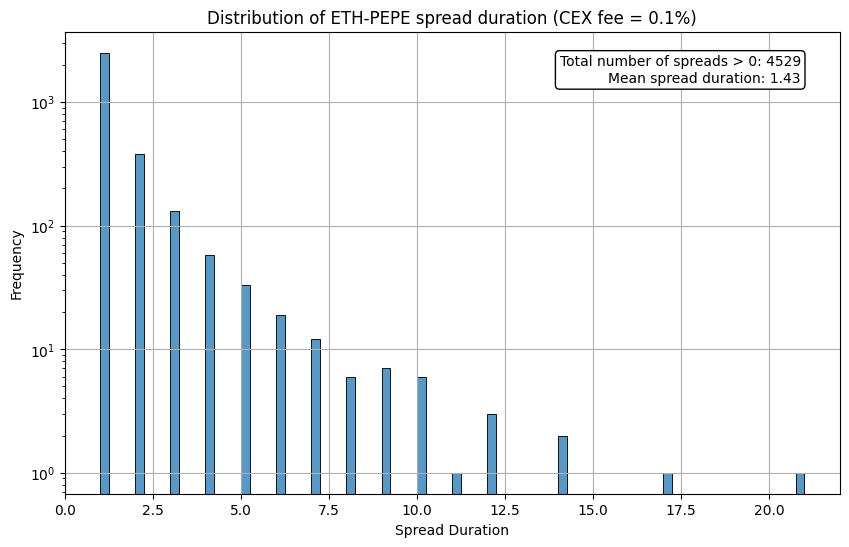

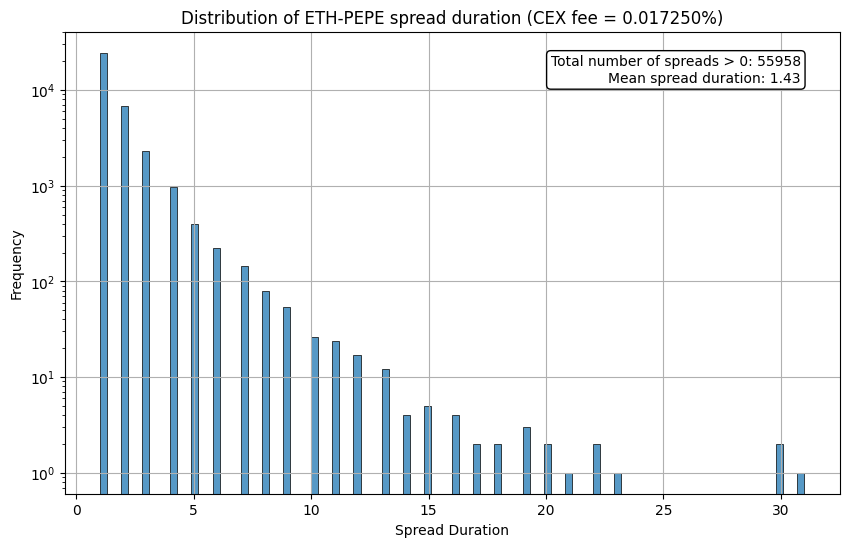

In [99]:
# plot distribution of windows' length of positive spreads

# def cex fee
filtered = df_stat[(df_stat['price_spread_fee_def'] > 0)]
count = len(filtered)
mean_val = filtered['price_spread_fee_def'].mean()

plt.figure(figsize=(10, 6))

sns.histplot(groups_with_signal_fee_def, bins=80, kde=False)
plt.yscale('log')
plt.title('Distribution of ETH-PEPE spread duration (CEX fee = 0.1%)')
plt.xlabel('Spread Duration')
plt.ylabel('Frequency')
plt.grid(True)
plt.text(
    0.95, 0.95,
    f'Total number of spreads > 0: {count}\nMean spread duration: {average_signal_duration_fee_def:.2f}',
    horizontalalignment='right',
    verticalalignment='top',
    transform=plt.gca().transAxes,
    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="black")
)
plt.show()

# min cex fee
filtered = df_stat[(df_stat['price_spread_fee_min'] > 0)]
count = len(filtered)
mean_val = filtered['price_spread_fee_min'].mean()
plt.figure(figsize=(10, 6))
sns.histplot(groups_with_signal_fee_min, bins=100, kde=False)
plt.yscale('log')
plt.title('Distribution of ETH-PEPE spread duration (CEX fee = 0.017250%)')
plt.xlabel('Spread Duration')
plt.ylabel('Frequency')
plt.grid(True)

plt.text(
    0.95, 0.95,
    f'Total number of spreads > 0: {count}\nMean spread duration: {average_signal_duration_fee_def:.2f}',
    horizontalalignment='right',
    verticalalignment='top',
    transform=plt.gca().transAxes,
    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="black")
)

plt.show()

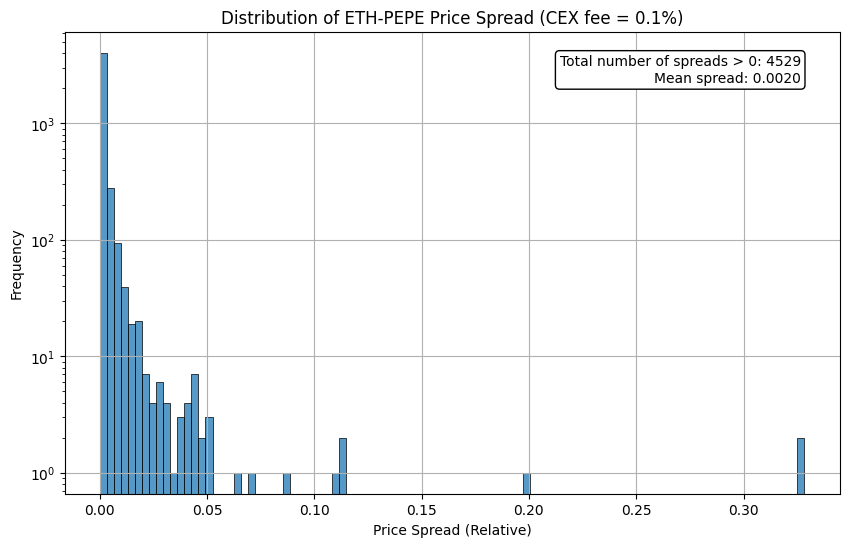

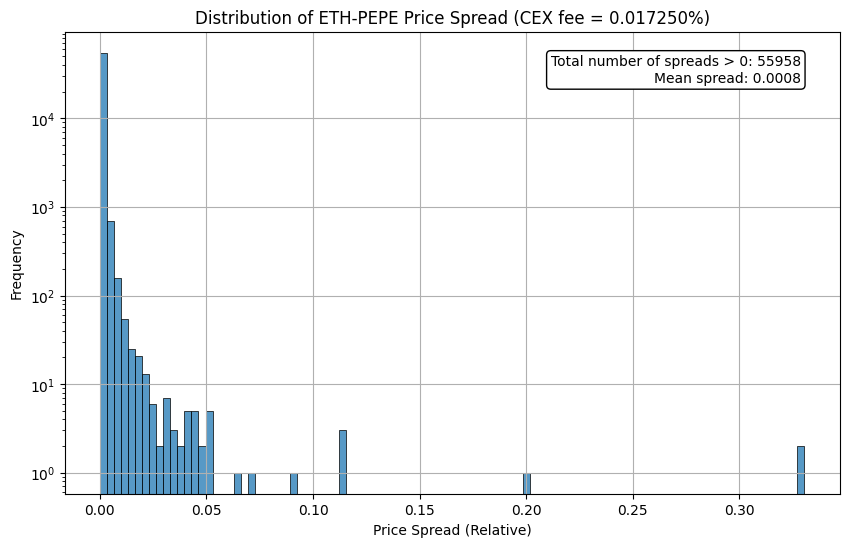

In [100]:
# plot distribution of positive spreads
# consider only spreads larger than 0

# def cex fee
filtered = df_stat[(df_stat['price_spread_fee_def'] > 0)]
count = len(filtered)
mean_val = filtered['price_spread_fee_def'].mean()
plt.figure(figsize=(10, 6))
sns.histplot(filtered['price_spread_fee_def'] , bins=100, kde=False)
plt.yscale('log')
plt.title('Distribution of ETH-PEPE Price Spread (CEX fee = 0.1%)')
plt.xlabel('Price Spread (Relative)')
plt.ylabel('Frequency')
plt.grid(True)
plt.text(
    0.95, 0.95,
    f'Total number of spreads > 0: {count}\nMean spread: {mean_val:.4f}',
    horizontalalignment='right',
    verticalalignment='top',
    transform=plt.gca().transAxes,
    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="black")
)
plt.show()

# min cex fee
filtered = df_stat[(df_stat['price_spread_fee_min'] > 0)]
count = len(filtered)
mean_val = filtered['price_spread_fee_min'].mean()
plt.figure(figsize=(10, 6))
sns.histplot(filtered['price_spread_fee_min'] , bins=100, kde=False)
plt.yscale('log')
plt.title('Distribution of ETH-PEPE Price Spread (CEX fee = 0.017250%)')
plt.xlabel('Price Spread (Relative)')
plt.ylabel('Frequency')
plt.grid(True)

plt.text(
    0.95, 0.95,
    f'Total number of spreads > 0: {count}\nMean spread: {mean_val:.4f}',
    horizontalalignment='right',
    verticalalignment='top',
    transform=plt.gca().transAxes,
    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="black")
)

plt.show()

In [101]:
# it's possible to consider different strategies depending on value of spread threshold: the higher it is - the less signals you get
# define thresholds
spread_thresholds = [0, 0.005, 0.01]

def signal(thresholds : list):
    results = {}
    # iterate over thresholds
    for spread_threshold in thresholds:
    # create signal variable: 1 if spread is larger than threshold
        signal_fee_def = np.where(df_stat["price_spread_fee_def"] > spread_threshold, 1, 0)
        signal_fee_min = np.where(df_stat["price_spread_fee_min"] > spread_threshold, 1, 0)
        results["threshold_" + str(spread_threshold)] = (signal_fee_def.sum(), signal_fee_min.sum())
    # display results
        print("---------------------------------------------------------------------------------------------------")
        print(f"Total number of signals with threshold = {spread_threshold} and default CEX fee = {cex_fee_def}: {signal_fee_def.sum()}")
        print(f"Total number of signals with threshold = {spread_threshold} and minimal CEX fee = {cex_fee_min}: {signal_fee_min.sum()}")
        print("---------------------------------------------------------------------------------------------------")
    return results
number_of_signals = signal(spread_thresholds)


---------------------------------------------------------------------------------------------------
Total number of signals with threshold = 0 and default CEX fee = 0.002: 4529
Total number of signals with threshold = 0 and minimal CEX fee = 0.000345: 55958
---------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------
Total number of signals with threshold = 0.005 and default CEX fee = 0.002: 310
Total number of signals with threshold = 0.005 and minimal CEX fee = 0.000345: 489
---------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------
Total number of signals with threshold = 0.01 and default CEX fee = 0.002: 126
Total number of signals with threshold = 0.01 and minimal CEX fee = 0.000345: 157
------------------

In [102]:
# calculation of average spread time length
def avg_spread_window(thresholds):
    results = {}
    for spread_threshold in thresholds:
        # compute signals
        signal_fee_def = np.where(df_stat["price_spread_fee_def"] > spread_threshold, 1, 0)
        signal_fee_min = np.where(df_stat["price_spread_fee_min"] > spread_threshold, 1, 0)

        df_stat["signal_fee_def"] = signal_fee_def
        # shift signal variable to compare it with itself: if values are different - new sequence starts
        df_stat["sequence_id_fee_def"] = (df_stat["signal_fee_def"] != df_stat["signal_fee_def"].shift()).cumsum()
        # choose sequences with signal presence (1)
        groups_with_signal_fee_def = df_stat[df_stat['signal_fee_def'] == 1].groupby("sequence_id_fee_def").size()
        # average window size
        average_signal_duration_fee_def = groups_with_signal_fee_def.mean()

        # same for minimal fee
        df_stat["signal_fee_min"] = signal_fee_min
        df_stat["sequence_id_fee_min"] = (df_stat["signal_fee_min"] != df_stat["signal_fee_min"].shift()).cumsum()
        # choose sequences with signal presence (1)
        groups_with_signal_fee_min = df_stat[df_stat['signal_fee_min'] == 1].groupby("sequence_id_fee_min").size()
        # average window size
        average_signal_duration_fee_min = groups_with_signal_fee_min.mean()

        print("---------------------------------------------------------------------------------------------------")
        print(f"Average duration of a signal (with defaul CEX fee = {cex_fee_def}) is: {average_signal_duration_fee_def:.2f}.")
        print(f"Average duration of a signal (with minimal CEX fee = {cex_fee_min}) is: {average_signal_duration_fee_min:.2f}.")
        print("---------------------------------------------------------------------------------------------------")

        results["threshold_" + str(spread_threshold)] = (average_signal_duration_fee_def, average_signal_duration_fee_min)

    # drop auxilary columns no to mess data
    df_stat.drop(columns = ["signal_fee_def", "sequence_id_fee_def", "signal_fee_min", "sequence_id_fee_min"], axis = 1)
    return results
avg_spread_windows = avg_spread_window(spread_thresholds)

---------------------------------------------------------------------------------------------------
Average duration of a signal (with defaul CEX fee = 0.002) is: 1.43.
Average duration of a signal (with minimal CEX fee = 0.000345) is: 1.57.
---------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------
Average duration of a signal (with defaul CEX fee = 0.002) is: 1.60.
Average duration of a signal (with minimal CEX fee = 0.000345) is: 1.62.
---------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------
Average duration of a signal (with defaul CEX fee = 0.002) is: 1.43.
Average duration of a signal (with minimal CEX fee = 0.000345) is: 1.48.
--------------------------------------------------------------------------

In [103]:
# is there a mistake in data
# # max spread
max_spread = df_stat["price_spread_fee_def"].max()
print(f"Max spread is: {max_spread:.4f}.")

Max spread is: 0.3284.


In [104]:
df_stat["price_spread_fee_def"].argmax()

281381

In [105]:
df_stat.iloc[281379:281385]

,timestamp,open_cex,high_cex,low_cex,close_cex,volume_cex,pair,open_dex,high_dex,low_dex,...,buy_price_fee_def,sell_price_fee_def,buy_price_fee_min,sell_price_fee_min,price_spread_fee_def,price_spread_fee_min,signal_fee_def,signal_fee_min,sequence_id_fee_def,sequence_id_fee_min
281379,2024-11-12 09:39:00,2.354330e+08,2.361705e+08,2.351180e+08,2.357822e+08,2.528810e+08,ETH/PEPE,2.347906e+08,2.347906e+08,2.347906e+08,...,2.354971e+08,2.353106e+08,2.354971e+08,2.357008e+08,-0.000792,0.000865,0,0,79,103
281380,2024-11-12 09:40:00,2.356182e+08,2.379236e+08,2.355647e+08,2.372722e+08,5.971242e+09,ETH/PEPE,2.347906e+08,2.362609e+08,2.347906e+08,...,2.369718e+08,2.367977e+08,2.369718e+08,2.371904e+08,-0.000735,0.000922,0,0,79,103
281381,2024-11-12 09:41:00,2.372729e+08,2.376324e+08,2.362636e+08,2.364442e+08,1.079826e+09,ETH/PEPE,2.362609e+08,2.362609e+08,1.771087e+08,...,1.776416e+08,2.359713e+08,1.776416e+08,2.363626e+08,0.328356,0.330559,1,1,80,104
281382,2024-11-12 09:42:00,2.364442e+08,2.368604e+08,2.361135e+08,2.363489e+08,1.275662e+09,ETH/PEPE,1.771087e+08,1.771087e+08,1.771087e+08,...,1.776416e+08,2.358762e+08,1.776416e+08,2.362673e+08,0.327821,0.330023,1,1,80,104
281383,2024-11-12 09:43:00,2.361628e+08,2.365568e+08,2.357448e+08,2.357921e+08,4.477880e+08,ETH/PEPE,1.771087e+08,2.363424e+08,1.771087e+08,...,2.362646e+08,2.356334e+08,2.358734e+08,2.356334e+08,-0.002672,-0.001018,0,0,81,105
281384,2024-11-12 09:44:00,2.357858e+08,2.363547e+08,2.352530e+08,2.353016e+08,6.403333e+08,ETH/PEPE,2.363424e+08,2.363424e+08,2.363424e+08,...,2.357731e+08,2.356334e+08,2.353828e+08,2.356334e+08,-0.000593,0.001064,0,0,81,105
